C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6628 - loss: 1.0181
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8936 - loss: 0.3532
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9193 - loss: 0.2772
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9292 - loss: 0.2359
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9396 - loss: 0.2080
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


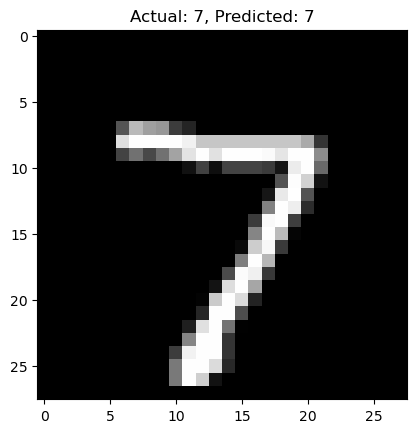

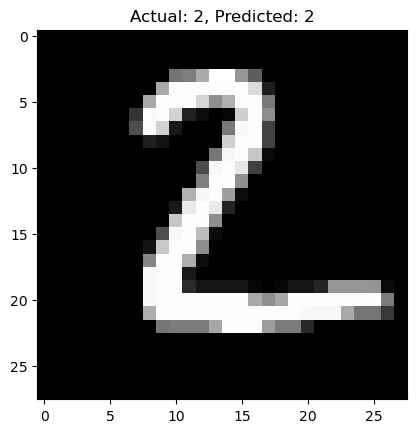

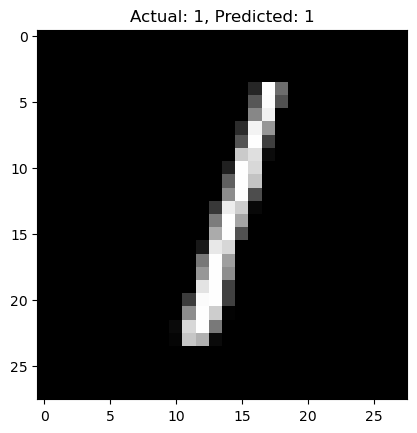

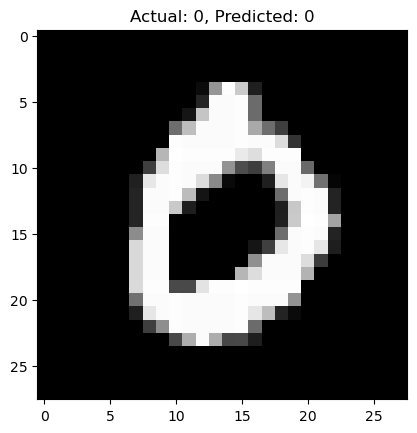

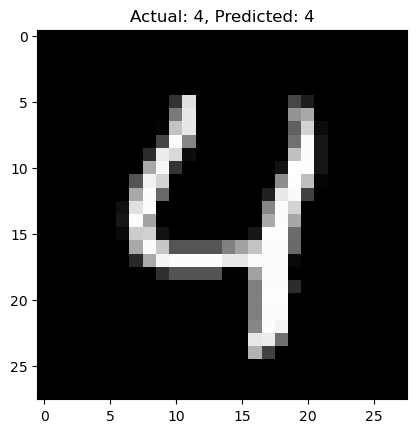

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the modified ANN model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))            # Input layer
model.add(layers.Dense(128, activation='sigmoid'))         # Hidden layer with Sigmoid activation
model.add(layers.Dropout(0.5))                             # Dropout layer to prevent overfitting
model.add(layers.Dense(64, activation='relu'))             # Hidden layer with ReLU activation
model.add(layers.Dropout(0.3))                             # Dropout layer to prevent overfitting
model.add(layers.Dense(10, activation='softmax'))          # Output layer with 10 units for 10 classes

# Compile the modified model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=5)

# Make predictions on the test set
predictions = model.predict(x_test)

# Visualize some predictions
num_images = 5
for i in range(num_images):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Actual: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.show()
